In [3]:
pip install --upgrade pandas jinja2 dataframe_image


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\programdata\anaconda3\lib\site-packages (1.4.4)
   ---------------------------------------- 11.6/11.6 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [1]:

import os          
import cv2                                 
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import *         
import matplotlib.pyplot as plt 
import sklearn.model_selection as model_selection
from keras.optimizers import Adam

   

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
opt = Adam(learning_rate=0.001)


In [3]:
import os
import cv2

def load_data(dataset):
    images = []
    labels = []
    class_names = os.listdir(dataset)
    
    for label_index, folder in enumerate(class_names):
        folder_path = os.path.join(dataset, folder)
        for file in os.listdir(folder_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # check for image files only
                img_path = os.path.join(folder_path, file)
                image = cv2.imread(img_path)
                if image is None:
                    print(f"Warning: Unable to read image: {img_path}")
                    continue  # skip bad images
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (150, 150))
                images.append(image)
                labels.append(label_index)
    
    return np.array(images), np.array(labels), class_names


In [4]:
dataset = 'D:/Indhu/DATASET/fruit/images/'
images, labels, class_names = load_data(dataset)

In [5]:
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32') 

In [6]:
images = images/255.0

In [7]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

In [8]:
RRNET8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])



C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
RRNET8.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])



In [10]:
history_RRNET8 = RRNET8.fit(train_images, train_labels, batch_size=128, epochs = 50, validation_split = 0.2)



Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.0544 - loss: 3.3494 - val_accuracy: 0.0517 - val_loss: 3.0894
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1296 - loss: 2.8663 - val_accuracy: 0.1034 - val_loss: 2.6823
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1118 - loss: 2.5210 - val_accuracy: 0.0862 - val_loss: 2.4517
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1255 - loss: 2.3996 - val_accuracy: 0.0862 - val_loss: 2.3272
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1287 - loss: 2.2732 - val_accuracy: 0.0862 - val_loss: 2.2614
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1540 - loss: 2.1719 - val_accuracy: 0.1552 - val_loss: 2.1512
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2074 - loss: 2.1169 - val_accuracy: 0.2759 - val_loss: 2.0511
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2457 - loss: 2.0716 - val_accuracy: 0.3103 - val_loss: 1.9110
Epoch 9/50
2/2 ━

In [11]:
RRNET8_evaluate = RRNET8.evaluate(test_images, test_labels)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4136 - loss: 4.1165


In [12]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

# Load the InceptionV3 base model (excluding the top classifier layers)
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=train_images.shape[1:])

# Freeze the base model
base_model.trainable = False

# Build the model
Inception_model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # assuming 10 classes
])

# Compile the model
Inception_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model
history_Inception = Inception_model.fit(train_images, train_labels,
                                        batch_size=128,
                                        epochs=50,
                                        validation_split=0.2)

# Evaluate the model
Inception_evaluate = Inception_model.evaluate(test_images, test_labels)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1334 - loss: 4.7812 - val_accuracy: 0.5345 - val_loss: 4.3699
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step - accuracy: 0.5183 - loss: 4.7631 - val_accuracy: 0.6207 - val_loss: 2.9587
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step - accuracy: 0.5954 - loss: 2.8953 - val_accuracy: 0.7069 - val_loss: 1.9929
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step - accuracy: 0.7095 - loss: 1.8351 - val_accuracy: 0.7586 - val_loss: 1.0697
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step - accuracy: 0.7903 - loss: 0.7287 - val_accuracy: 0.7759 - val_loss: 0.9332
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step - accuracy: 0.8545 - loss: 0.4832 - val_accuracy: 0.7069 - val_loss: 1.2630
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step - accuracy: 0.8538 - loss: 0.4959 - val_accuracy: 0.7241 - val_loss: 0.9435
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step - accuracy: 0.8722 - loss: 0.3666 - val_accuracy: 0.7931 - val_loss: 0.

In [13]:
import tensorflow as tf

# Load ResNet50 base model without top layers (we'll customize the classifier part)
base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=train_images.shape[1:])
base_model.trainable = False  # freeze base for feature extraction (optional)

# Build the model
ResNet50_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # for 10 classes
])

# Compile the model
ResNet50_model.compile(optimizer='adam', 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])

# Train the model
history_ResNet50 = ResNet50_model.fit(train_images, train_labels, 
                                      batch_size=128, 
                                      epochs=50, 
                                      validation_split=0.2)

# Evaluate on test data
ResNet50_evaluate = ResNet50_model.evaluate(test_images, test_labels)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.1037 - loss: 2.5292 - val_accuracy: 0.1379 - val_loss: 2.2416
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1275 - loss: 2.3126 - val_accuracy: 0.0690 - val_loss: 2.2159
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.0985 - loss: 2.3636 - val_accuracy: 0.0517 - val_loss: 2.1932
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1624 - loss: 2.2716 - val_accuracy: 0.1207 - val_loss: 2.1943
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1819 - loss: 2.2598 - val_accuracy: 0.1379 - val_loss: 2.1994
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1776 - loss: 2.1860 - val_accuracy: 0.1207 - val_loss: 2.1971
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1740 - loss: 2.1992 - val_accuracy: 0.1724 - val_loss: 2.1752
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.2068 - loss: 2.1293 - val_accuracy: 0.2414 - val_loss: 2.1510
Epoch 9/50
2/2 ━

In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load VGG16 with pretrained ImageNet weights, excluding the top classifier
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze convolutional base

# Build the model
VGG16_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # for 10 classes
])


# Add your custom classification head
  # adjust for number of classes

VGG16_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_VGG16 = VGG16_model.fit(train_images, train_labels, batch_size=128, epochs=50, validation_split=0.2)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.1419 - loss: 2.8497 - val_accuracy: 0.3621 - val_loss: 1.8250
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4829 - loss: 1.4987 - val_accuracy: 0.5000 - val_loss: 1.2863
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.6849 - loss: 0.9395 - val_accuracy: 0.6207 - val_loss: 1.1030
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8155 - loss: 0.5969 - val_accuracy: 0.6207 - val_loss: 1.0668
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8545 - loss: 0.4490 - val_accuracy: 0.6552 - val_loss: 1.0148
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.8463 - loss: 0.4178 - val_accuracy: 0.6552 - val_loss: 0.9356
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.9300 - loss: 0.2338 - val_accuracy: 0.6207 - val_loss: 0.9193
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.9608 - loss: 0.1720 - val_accuracy: 0.6897 - val_loss: 0.8871
Epoch 9/50
2/2 ━

In [22]:
VGG16_evaluate = VGG16_model.evaluate(test_images, test_labels)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - accuracy: 0.7470 - loss: 0.9789


In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define AlexNet-like architecture
def build_alexnet(input_shape=(150, 150, 3), num_classes=10):
    model = models.Sequential()

    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model
alexnet_model = build_alexnet()

# Freeze feature extraction layers (up to the flatten layer)
for layer in alexnet_model.layers[:-4]:
    layer.trainable = False

# Compile the model
alexnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_alexnet = alexnet_model.fit(train_images, train_labels, batch_size=128, epochs=50, validation_split=0.2)




Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 480ms/step - accuracy: 0.0892 - loss: 2.2961 - val_accuracy: 0.1724 - val_loss: 2.2514
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - accuracy: 0.1287 - loss: 2.1972 - val_accuracy: 0.0690 - val_loss: 2.2075
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step - accuracy: 0.1423 - loss: 2.1698 - val_accuracy: 0.2759 - val_loss: 2.1715
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - accuracy: 0.1987 - loss: 2.1483 - val_accuracy: 0.3276 - val_loss: 2.1507
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.2363 - loss: 2.1198 - val_accuracy: 0.2241 - val_loss: 2.1530
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - accuracy: 0.2275 - loss: 2.1134 - val_accuracy: 0.2069 - val_loss: 2.1201
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.2963 - loss: 2.0656 - val_accuracy: 0.2586 - val_loss: 2.1033
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step - accuracy: 0.2606 - loss: 2.0584 - val_accuracy: 0.2759 - val_loss:

In [25]:
alexnet_evaluate = alexnet_model.evaluate(test_images, test_labels)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4184 - loss: 1.6064


In [27]:
import tensorflow as tf

# Define the original LeNet model
LeNet = tf.keras.Sequential()
LeNet.add(tf.keras.layers.Conv2D(6, 5, activation='tanh', input_shape=train_images.shape[1:], padding='valid'))
LeNet.add(tf.keras.layers.AveragePooling2D(2))
LeNet.add(tf.keras.layers.Activation('sigmoid'))

LeNet.add(tf.keras.layers.Conv2D(16, 5, activation='tanh'))
LeNet.add(tf.keras.layers.AveragePooling2D(2))
LeNet.add(tf.keras.layers.Activation('sigmoid'))

LeNet.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))
LeNet.add(tf.keras.layers.Flatten())

# Freeze convolutional layers (feature extractor)
for layer in LeNet.layers[:-2]:  # freezing all but Dense layers
    layer.trainable = False

# Add / keep classifier layers
LeNet.add(tf.keras.layers.Dense(84, activation='tanh'))
LeNet.add(tf.keras.layers.Dense(10, activation='softmax'))  # 10 classes

# Compile the model
LeNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_LeNet = LeNet.fit(train_images, train_labels, batch_size=128, epochs=50, validation_split=0.2)

# Evaluate
LeNet_evaluate = LeNet.evaluate(test_images, test_labels)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.1151 - loss: 2.6826 - val_accuracy: 0.0690 - val_loss: 3.6520
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.1281 - loss: 3.3095 - val_accuracy: 0.0690 - val_loss: 3.5249
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.1151 - loss: 3.3028 - val_accuracy: 0.0690 - val_loss: 3.4047
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.1125 - loss: 3.2042 - val_accuracy: 0.0690 - val_loss: 3.2984
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.1072 - loss: 3.1301 - val_accuracy: 0.0690 - val_loss: 3.2008
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.1229 - loss: 2.9458 - val_accuracy: 0.0690 - val_loss: 3.1151
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.1125 - loss: 2.8974 - val_accuracy: 0.0690 - val_loss: 3.0342
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.1125 - loss: 2.8824 - val_accuracy: 0.0690 - val_loss:

In [36]:
RRNET8 = history_RRNET8.history   
alexnet = history_alexnet.history
LeNet = history_LeNet.history
Inception = history_Inception.history
ResNet50 = history_ResNet50.history
VGG16 = history_VGG16.history

comparison = pd.DataFrame()

comparison['RRNET8_accuracy']  = RRNET8['accuracy']
comparison['RRNET8_val_accuracy'] = RRNET8['val_accuracy']
comparison['RRNET8_loss']  = RRNET8['loss']
comparison['RRNET8_val_loss'] = RRNET8['val_loss']

comparison['alexnet_accuracy']  =alexnet['accuracy']
comparison['alexnet_val_accuracy'] = alexnet['val_accuracy']
comparison['alexnet_loss']  = alexnet['loss']
comparison['alexnet_val_loss'] = alexnet['val_loss']

comparison['LeNet_accuracy']  = LeNet['accuracy']
comparison['LeNet_val_accuracy'] = LeNet['val_accuracy']
comparison['LeNet_loss']  = LeNet['loss']
comparison['LeNet_val_loss'] = LeNet['val_loss']

comparison['Inception_accuracy']  = RRNET8['accuracy']
comparison['Inception_val_accuracy'] = RRNET8['val_accuracy']
comparison['Inception_loss']  = RRNET8['loss']
comparison['Inception_val_loss'] = RRNET8['val_loss']

comparison['ResNet50_accuracy']  = RRNET8['accuracy']
comparison['ResNet50_val_accuracy'] = RRNET8['val_accuracy']
comparison['ResNet50_loss']  = RRNET8['loss']
comparison['ResNet50_val_loss'] = RRNET8['val_loss']

comparison['VGG16_accuracy']  = VGG16['accuracy']
comparison['VGG16_val_accuracy'] = VGG16['val_accuracy']
comparison['VGG16_loss']  = VGG16['loss']
comparison['VGG16_val_loss'] = VGG16['val_loss']

comparison

,RRNET8_accuracy,RRNET8_val_accuracy,RRNET8_loss,RRNET8_val_loss,alexnet_accuracy,alexnet_val_accuracy,alexnet_loss,alexnet_val_loss,LeNet_accuracy,LeNet_val_accuracy,...,Inception_loss,Inception_val_loss,ResNet50_accuracy,ResNet50_val_accuracy,ResNet50_loss,ResNet50_val_loss,VGG16_accuracy,VGG16_val_accuracy,VGG16_loss,VGG16_val_loss
0,0.069869,0.051724,3.327274,3.089425,0.082969,0.172414,2.295591,2.251369,0.117904,0.068966,...,3.327274,3.089425,0.069869,0.051724,3.327274,3.089425,0.165939,0.362069,2.793676,1.825004
1,0.139738,0.103448,2.843842,2.682259,0.126638,0.068966,2.196221,2.207456,0.117904,0.068966,...,2.843842,2.682259,0.139738,0.103448,2.843842,2.682259,0.497817,0.500000,1.459699,1.286324
2,0.109170,0.086207,2.526076,2.451689,0.135371,0.275862,2.170837,2.171483,0.117904,0.068966,...,2.526076,2.451689,0.109170,0.086207,2.526076,2.451689,0.703057,0.620690,0.901822,1.103040
3,0.117904,0.086207,2.385890,2.327235,0.196507,0.327586,2.150272,2.150701,0.117904,0.068966,...,2.385890,2.327235,0.117904,0.086207,2.385890,2.327235,0.820961,0.620690,0.582088,1.066848
4,0.126638,0.086207,2.285860,2.261369,0.248908,0.224138,2.114504,2.152993,0.117904,0.068966,...,2.285860,2.261369,0.126638,0.086207,2.285860,2.261369,0.855895,0.655172,0.447161,1.014776
5,0.152838,0.155172,2.171649,2.151172,0.235808,0.206897,2.103750,2.120091,0.117904,0.068966,...,2.171649,2.151172,0.152838,0.155172,2.171649,2.151172,0.851528,0.655172,0.408877,0.935646
6,0.209607,0.275862,2.113647,2.051148,0.288210,0.258621,2.064139,2.103262,0.117904,0.068966,...,2.113647,2.051148,0.209607,0.275862,2.113647,2.051148,0.930131,0.620690,0.244992,0.919292
7,0.235808,0.310345,2.066153,1.910998,0.262009,0.275862,2.052414,2.086996,0.117904,0.068966,...,2.066153,1.910998,0.235808,0.310345,2.066153,1.910998,0.960699,0.689655,0.178726,0.887054
8,0.248908,0.379310,1.965227,1.886068,0.288210,0.362069,2.030755,2.057495,0.117904,0.068966,...,1.965227,1.886068,0.248908,0.379310,1.965227,1.886068,0.960699,0.689655,0.158536,0.872985
9,0.358079,0.327586,1.810534,1.802683,0.388646,0.344828,1.990280,2.027552,0.117904,0.068966,...,1.810534,1.802683,0.358079,0.327586,1.810534,1.802683,0.965065,0.672414,0.123050,0.844420


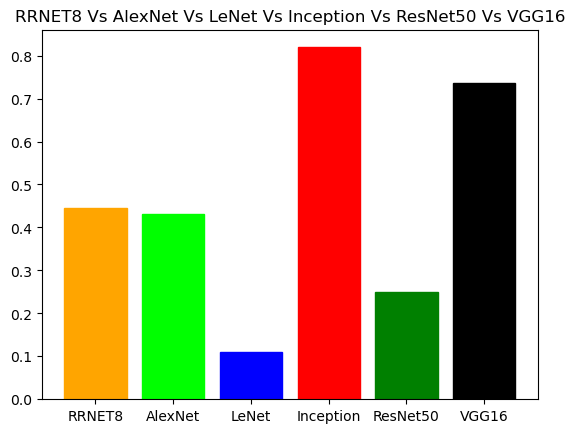

In [39]:
accuracy =[RRNET8_evaluate[1],alexnet_evaluate[1], LeNet_evaluate[1], Inception_evaluate[1], ResNet50_evaluate[1], VGG16_evaluate[1] ]
lable = ["RRNET8", "AlexNet" , "LeNet", "Inception", "ResNet50", "VGG16" ]

barlist = plt.bar(lable,accuracy)

barlist[0].set_color('orange')
barlist[1].set_color('lime')
barlist[2].set_color('blue')
barlist[3].set_color('Red')
barlist[4].set_color('Green')
barlist[5].set_color('black')

plt.title("RRNET8 Vs AlexNet Vs LeNet Vs Inception Vs ResNet50 Vs VGG16")

plt.show()

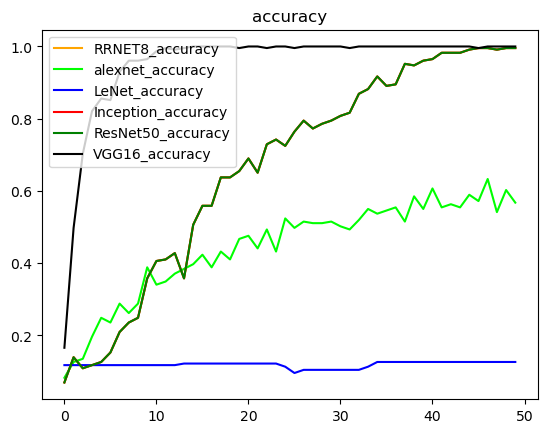

In [42]:
def plot_accuracy():
    plt.plot(comparison['RRNET8_accuracy'],color='orange',label = 'RRNET8_accuracy')
    
    plt.plot(comparison['alexnet_accuracy'],color='lime',label = 'alexnet_accuracy')
    
    plt.plot(comparison['LeNet_accuracy'],color='blue',label = 'LeNet_accuracy')
    
    plt.plot(comparison['Inception_accuracy'],color='Red',label = 'Inception_accuracy')
    
    plt.plot(comparison['ResNet50_accuracy'],color='Green',label = 'ResNet50_accuracy')
    
    plt.plot(comparison['VGG16_accuracy'],color='Black',label = 'VGG16_accuracy')
    
    
    plt.legend()
    plt.title('accuracy')
    #plt.title('RRNET8_accuracy Vs alexnet_accuracy Vs LeNet_val_accuracy  Vs Inception_val_accuracy  Vs ResNet50_val_accuracy  Vs VGG16_val_accuracy')
    plt.show()

plot_accuracy()

In [44]:
alexnet_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_104 (Conv2D)             │ (None, 35, 35, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 35, 35, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 17, 17, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 17, 17, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4096)           │     9,441,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,656,736 (242.83 MB)

 Trainable params: 16,822,282 (64.17 MB)

 Non-trainable params: 13,189,888 (50.32 MB)

 Optimizer params: 33,644,566 (128.34 MB)

In [46]:
Inception_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 3, 3, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,128,064 (107.30 MB)

 Trainable params: 2,108,426 (8.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 4,216,854 (16.09 MB)

In [48]:
ResNet50_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,750,368 (102.04 MB)

 Trainable params: 1,054,218 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,108,438 (8.04 MB)

In [49]:
VGG16_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,014,624 (80.16 MB)

 Trainable params: 2,099,978 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 4,199,958 (16.02 MB)

In [52]:
!pip install openpyxl


In [53]:
import pandas as pd

# Save the DataFrame to an Excel file
comparison.to_excel("model_comparison.xlsx", index=False)


C:\Users\Indhuma\AppData\Local\Temp\ipykernel_17968\2131458682.py:4: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  comparison.to_excel("model_comparison.xlsx", index=False)


In [55]:
import pandas as pd

# Prepare data
accuracy = [RRNET8_evaluate[1], alexnet_evaluate[1], LeNet_evaluate[1], Inception_evaluate[1], ResNet50_evaluate[1], VGG16_evaluate[1]]
labels = ["RRNET8", "alexnet", "LeNet", "Inception", "ResNet50", "VGG16"]

# Create DataFrame
accuracy_df = pd.DataFrame({
    "Model": labels,
    "Accuracy": accuracy
})

# Save to Excel
accuracy_df.to_excel("model_accuracy_comparison.xlsx", index=False)


C:\Users\Indhuma\AppData\Local\Temp\ipykernel_17968\1417237808.py:14: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  accuracy_df.to_excel("model_accuracy_comparison.xlsx", index=False)


In [56]:
import pandas as pd

# Create DataFrame
accuracy_df = pd.DataFrame({
    'Model': ["RRNET8", "AlexNet", "LeNet", "Inception", "ResNet50", "VGG16"],
    'Accuracy': [RRNET8_evaluate[1], alexnet_evaluate[1], LeNet_evaluate[1],
                 Inception_evaluate[1], ResNet50_evaluate[1], VGG16_evaluate[1]]
})

# Save to Excel
excel_path = "model_accuracy_with_chart.xlsx"
accuracy_df.to_excel(excel_path, index=False)


C:\Users\Indhuma\AppData\Local\Temp\ipykernel_17968\224885183.py:12: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  accuracy_df.to_excel(excel_path, index=False)


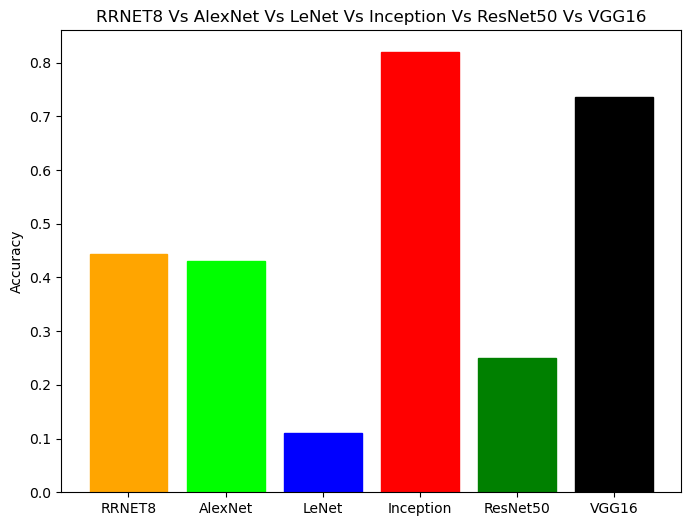

In [57]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 6))
barlist = plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'])

barlist[0].set_color('orange')
barlist[1].set_color('lime')
barlist[2].set_color('blue')
barlist[3].set_color('red')
barlist[4].set_color('green')
barlist[5].set_color('black')

plt.title("RRNET8 Vs AlexNet Vs LeNet Vs Inception Vs ResNet50 Vs VGG16")
plt.ylabel("Accuracy")

# Save chart as image
chart_path = "model_accuracy_chart.png"
plt.savefig(chart_path)

plt.show()


In [58]:
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# Load the existing Excel file
workbook = load_workbook(excel_path)
sheet = workbook.active

# Add image to sheet
img = Image(chart_path)
img.anchor = 'D2'  # Position to place the image

sheet.add_image(img)

# Save updated Excel file
workbook.save(excel_path)


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# Step 1: Prepare model accuracy data
accuracy = [
    RRNET8_evaluate[1], 
    alexnet_evaluate[1], 
    LeNet_evaluate[1], 
    Inception_evaluate[1], 
    ResNet50_evaluate[1], 
    VGG16_evaluate[1]
]
labels = ["RRNET8", "AlexNet", "LeNet", "Inception", "ResNet50", "VGG16"]

# Step 2: Create DataFrame and save to Excel
accuracy_df = pd.DataFrame({'Model': labels, 'Accuracy': accuracy})
excel_path = "model_accuracy_with_chart1.xlsx"
accuracy_df.to_excel(excel_path, index=False)

# Step 3: Create and save bar chart
plt.figure(figsize=(8, 6))
barlist = plt.bar(labels, accuracy)

barlist[0].set_color('orange')
barlist[1].set_color('lime')
barlist[2].set_color('blue')
barlist[3].set_color('red')
barlist[4].set_color('green')
barlist[5].set_color('black')

plt.title("RRNET8 Vs AlexNet Vs LeNet Vs Inception Vs ResNet50 Vs VGG16")
plt.ylabel("Accuracy")

chart_path = "model_accuracy_chart1.png"
plt.savefig(chart_path)
plt.close()  # close the plot to avoid showing again

# Step 4: Insert chart into Excel
workbook = load_workbook(excel_path)
sheet = workbook.active

img = Image(chart_path)
img.anchor = 'D2'  # Position to insert image

sheet.add_image(img)
workbook.save(excel_path)

print(" Excel file with data and chart saved as:", excel_path)


 Excel file with data and chart saved as: model_accuracy_with_chart1.xlsx


C:\Users\Indhuma\AppData\Local\Temp\ipykernel_17968\242521491.py:20: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  accuracy_df.to_excel(excel_path, index=False)
